In [15]:
# make imports
import pandas as pd

import numpy as np

from tsfresh import select_features

import xgboost

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from feature_selection import FeatureSelector

import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
# all extracted features from tsfresh
# the extracted features are the same for all models
full_features = pd.read_pickle('/Users/Rohil/Documents/iGEM/yemen/exhaustive_extracted_features.pkl')

In [4]:
# test values for different time frames (in a nice format)
y_df = pd.read_pickle('/Users/Rohil/Documents/iGEM/yemen/y_df_for_feature_selection.pkl')

In [5]:
y_df

,gov_iso,date,week_1_cases,week_2_cases,week_2_to_4_cases,week_4_to_6_cases,week_6_to_8_cases
0,YE-AB,2017-05-23,6.976066,7.594340,18.482427,51.257999,65.009775
1,YE-AD,2017-05-23,5.711380,16.454390,21.250650,28.290273,24.346000
2,YE-AM,2017-05-23,24.813754,32.088848,76.218802,92.430835,68.766904
3,YE-BA,2017-05-23,17.116538,11.683058,23.629375,29.137843,28.826720
4,YE-DA,2017-05-23,14.377386,14.077581,66.073362,85.859416,127.428383
5,YE-DH,2017-05-23,7.294939,9.135369,28.028750,44.058367,52.243076
6,YE-HD-AL,2017-05-23,0.000000,0.000000,0.000000,0.000000,0.000000
7,YE-HJ,2017-05-23,11.741123,19.222349,42.095584,58.737408,43.455614
8,YE-HU,2017-05-23,13.920317,9.705298,30.224088,30.935804,29.380802
9,YE-IB,2017-05-23,2.631505,7.376498,21.510737,19.025484,16.813813


In [6]:
#y_df.sort_values('date').to_pickle('/Users/Rohil/Documents/iGEM/yemen/y_df_for_feature_selection.pkl')

In [7]:
full_features.head()

,fatalities__abs_energy_week_1,fatalities__absolute_sum_of_changes_week_1,"fatalities__agg_autocorrelation__f_agg_""mean""_week_1","fatalities__agg_autocorrelation__f_agg_""median""_week_1","fatalities__agg_autocorrelation__f_agg_""var""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""_week_1",...,new_deaths__value_count__value_-inf_week_6,new_deaths__value_count__value_0_week_6,new_deaths__value_count__value_1_week_6,new_deaths__value_count__value_inf_week_6,new_deaths__value_count__value_nan_week_6,new_deaths__variance_week_6,new_deaths__variance_larger_than_standard_deviation_week_6,days_from,gov_iso,date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YE-AB,2017-05-23
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,YE-AD,2017-05-23
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YE-AM,2017-05-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YE-BA,2017-05-23
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YE-DA,2017-05-23


In [8]:
y_df.head()

,gov_iso,date,week_1_cases,week_2_cases,week_2_to_4_cases,week_4_to_6_cases,week_6_to_8_cases
0,YE-AB,2017-05-23,6.976066,7.594340,18.482427,51.257999,65.009775
1,YE-AD,2017-05-23,5.711380,16.454390,21.250650,28.290273,24.346000
2,YE-AM,2017-05-23,24.813754,32.088848,76.218802,92.430835,68.766904
3,YE-BA,2017-05-23,17.116538,11.683058,23.629375,29.137843,28.826720
4,YE-DA,2017-05-23,14.377386,14.077581,66.073362,85.859416,127.428383


In [9]:
# ignoring anything that happens before June, as there's not enough data for feature calculation
full_features = full_features[full_features.date>'2017-06-01']
y_df = y_df[y_df.date>'2017-06-01']

In [10]:
y_df.head()

,gov_iso,date,week_1_cases,week_2_cases,week_2_to_4_cases,week_4_to_6_cases,week_6_to_8_cases
42,YE-AB,2017-06-02,8.958386,9.248803,30.807418,70.762449,64.068704
43,YE-AD,2017-06-02,10.799400,7.232699,30.352818,26.111269,20.741909
44,YE-AM,2017-06-02,35.442796,33.168662,94.919745,72.335627,70.092938
45,YE-BA,2017-06-02,13.746042,13.111032,22.017918,30.813119,28.515597
46,YE-DA,2017-06-02,27.321017,23.658080,91.158560,119.877932,88.398358


In [11]:
# splitting ys by time frame
y1 = y_df[['date', 'gov_iso', 'week_1_cases']]
y2 = y_df[['date', 'gov_iso', 'week_2_cases']]
y2_4 = y_df[['date', 'gov_iso', 'week_2_to_4_cases']]
y4_6 = y_df[['date', 'gov_iso', 'week_4_to_6_cases']]
y6_8 = y_df[['date', 'gov_iso', 'week_6_to_8_cases']]

In [12]:
# merging so that rows with same data and governorate are lined up properly
full_data_1 = y1.dropna().merge(full_features, how = 'left', on = ['gov_iso', 'date']).sort_values('date')
full_data_2 = y2.dropna().merge(full_features, how = 'left', on = ['gov_iso', 'date']).sort_values('date')
full_data_2_4 = y2_4.dropna().merge(full_features, how = 'left', on = ['gov_iso', 'date']).sort_values('date')
full_data_4_6 = y4_6.dropna().merge(full_features, how = 'left', on = ['gov_iso', 'date']).sort_values('date')
full_data_6_8 = y6_8.dropna().merge(full_features, how = 'left', on = ['gov_iso', 'date']).sort_values('date')

C:\Users\Rohil\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


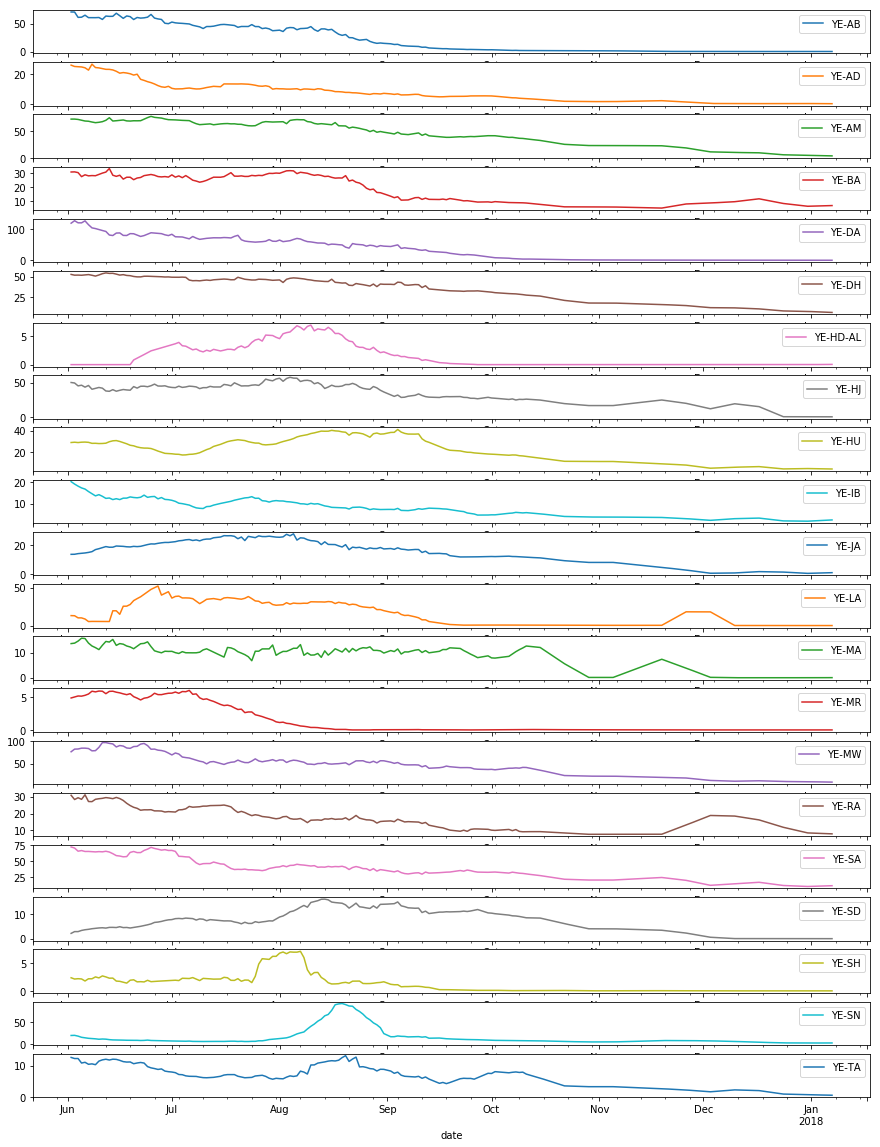

In [14]:
fig, ax = plt.subplots(figsize=(15,20))
y4_6.sort_values('date').dropna().pivot_table(index = 'date', columns = 'gov_iso', values='week_4_to_6_cases', aggfunc = 'sum').plot(subplots=True, ax =ax)
fig.savefig('/Users/Rohil/Documents/iGEM/yemen/cholera_epi_plots/4_to_6_week_cases.png')

In [22]:
full_data_4_6

,date,gov_iso,week_4_to_6_cases,fatalities__abs_energy_week_1,fatalities__absolute_sum_of_changes_week_1,"fatalities__agg_autocorrelation__f_agg_""mean""_week_1","fatalities__agg_autocorrelation__f_agg_""median""_week_1","fatalities__agg_autocorrelation__f_agg_""var""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""_week_1","fatalities__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""_week_1",...,new_deaths__time_reversal_asymmetry_statistic__lag_2_week_6,new_deaths__time_reversal_asymmetry_statistic__lag_3_week_6,new_deaths__value_count__value_-inf_week_6,new_deaths__value_count__value_0_week_6,new_deaths__value_count__value_1_week_6,new_deaths__value_count__value_inf_week_6,new_deaths__value_count__value_nan_week_6,new_deaths__variance_week_6,new_deaths__variance_larger_than_standard_deviation_week_6,days_from
0,2017-06-02,YE-AB,70.762449,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-1.221164e-06,-1.942760e-06,0.0,3.0,0.0,0.0,0.0,4.315822e-05,0.0,10
19,2017-06-02,YE-SN,20.160857,7.405355e-08,0.000577,-0.110204,-0.238095,0.603079,0.0,0.0,...,-2.776106e-08,-4.372743e-08,0.0,0.0,0.0,0.0,0.0,1.314628e-07,0.0,10
18,2017-06-02,YE-SH,2.363743,1.332078e-05,0.007068,-0.188311,-0.107981,0.376599,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,11.0,0.0,0.0,0.0,0.000000e+00,0.0,10
17,2017-06-02,YE-SD,2.136356,2.101817e-08,0.000308,-0.300680,-0.333333,0.186191,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,11.0,0.0,0.0,0.0,0.000000e+00,0.0,10
16,2017-06-02,YE-SA,72.482458,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-3.736049e-08,-5.329157e-08,0.0,3.0,0.0,0.0,0.0,4.886538e-06,0.0,10
15,2017-06-02,YE-RA,30.905165,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1.443090e-06,-7.285505e-08,0.0,0.0,0.0,0.0,0.0,4.067134e-05,0.0,10
14,2017-06-02,YE-MW,76.396854,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,2.793118e-06,2.679324e-07,0.0,0.0,0.0,0.0,0.0,2.235286e-05,0.0,10
13,2017-06-02,YE-MR,4.850000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,11.0,0.0,0.0,0.0,0.000000e+00,0.0,10
12,2017-06-02,YE-MA,13.572527,5.548596e-06,0.004711,-0.086103,-0.142857,0.023399,0.0,0.0,...,-1.778002e-08,-2.489204e-08,0.0,6.0,0.0,0.0,0.0,3.893464e-06,0.0,10
11,2017-06-02,YE-LA,13.127624,1.358346e-06,0.002331,-0.140525,-0.142857,0.026614,0.0,0.0,...,3.195487e-10,-2.907893e-09,0.0,3.0,0.0,0.0,0.0,1.797987e-06,0.0,10


In [23]:
# performing feature selection using tsfresh's scalable hypothesis tests

In [63]:
selected_features_1 = select_features(full_data_1[full_features.columns].drop(columns=['date', 'gov_iso', 'days_from']), full_data_1['week_1_cases'], fdr_level=0.001)
selected_features_1.shape

(5355, 11839)

In [64]:
selected_features_2 = select_features(full_data_2[full_features.columns].drop(columns=['date', 'gov_iso', 'days_from']), full_data_2['week_2_cases'], fdr_level=0.001)
selected_features_2.shape

(5208, 11825)

In [65]:
selected_features_2_4 = select_features(full_data_2_4[full_features.columns].drop(columns=['date', 'gov_iso', 'days_from']), full_data_2_4['week_2_to_4_cases'], fdr_level=0.001)
selected_features_2_4.shape

(4914, 11756)

In [66]:
selected_features_4_6 = select_features(full_data_4_6[full_features.columns].drop(columns=['date', 'gov_iso', 'days_from']), full_data_4_6['week_4_to_6_cases'], fdr_level=0.001)
selected_features_4_6.shape

(4620, 11694)

In [67]:
selected_features_6_8 = select_features(full_data_6_8[full_features.columns].drop(columns=['date', 'gov_iso', 'days_from']), full_data_6_8['week_6_to_8_cases'], fdr_level=0.001)
selected_features_6_8.shape

(4326, 11615)

In [68]:
selected_features_1 = pd.concat([full_data_1.date, selected_features_1], axis=1)
selected_features_2 = pd.concat([full_data_2.date, selected_features_2], axis=1)
selected_features_2_4 = pd.concat([full_data_2_4.date, selected_features_2_4], axis=1)
selected_features_4_6 = pd.concat([full_data_4_6.date, selected_features_4_6], axis=1)
selected_features_6_8 = pd.concat([full_data_6_8.date, selected_features_6_8], axis=1)

In [53]:
selected_features_4_6

,date,"new_cases__fft_coefficient__coeff_0__attr_""abs""_week_2","neighbor_new_deaths__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0_week_4",neighbor_new_cases__quantile__q_0.7_week_2,neighbor_new_cases__quantile__q_0.6_week_2,neighbor_new_cases__quantile__q_0.4_week_2,"neighbor_new_cases__linear_trend__attr_""intercept""_week_1",neighbor_new_deaths__c3__lag_3_week_4,neighbor_new_deaths__c3__lag_2_week_4,neighbor_new_cases__quantile__q_0.3_week_2,...,new_deaths__index_mass_quantile__q_0.2_week_2,"max_rainfall__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0_week_2","neighbor_fatalities__fft_coefficient__coeff_4__attr_""angle""_week_1","neighbor_max_rainfall__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4_week_6","mean_rainfall__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8_week_1",neighbor_fatalities__partial_autocorrelation__lag_7_week_2,"mean_rainfall__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8_week_1","fatalities__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.6_week_6",fatalities__last_location_of_maximum_week_6,"neighbor_fatalities__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4_week_2"
0,2017-06-02,10.910349,0.000000e+00,0.943220,0.943220,0.943220,1.045736,2.262325e-08,2.938188e-08,0.943220,...,0.181818,0.0,180.0,0.582506,0.000000e+00,-1.034947,0.000000e+00,0.000000e+00,1.000000,1.963260e-05
19,2017-06-02,15.220657,3.533617e-04,1.692989,1.692989,1.551008,1.669861,1.968195e-06,2.047369e-06,1.551008,...,0.272727,0.0,0.0,-1.836614,8.307350e-02,0.084854,5.933822e-02,-1.924234e-05,0.909091,0.000000e+00
18,2017-06-02,0.055256,4.785336e-04,0.902920,0.902920,0.902920,0.984956,7.920583e-08,9.790026e-08,0.902920,...,0.266667,0.0,0.0,-0.021433,1.069001e-01,-0.268891,7.635722e-02,2.019354e-04,1.000000,3.388132e-21
17,2017-06-02,0.275398,0.000000e+00,1.869793,1.869793,1.869793,1.654969,6.442910e-06,7.585418e-06,1.869793,...,0.266667,0.0,180.0,-0.182135,0.000000e+00,0.784484,0.000000e+00,0.000000e+00,1.000000,-6.004548e-05
16,2017-06-02,51.887737,8.773219e-05,1.375641,1.375641,1.375641,1.258811,2.016804e-07,2.020127e-07,1.375641,...,0.181818,0.0,0.0,0.000000,0.000000e+00,-1.313816,0.000000e+00,0.000000e+00,1.000000,-1.924234e-05
15,2017-06-02,9.878509,3.420684e-04,1.355806,1.355806,0.996430,1.433360,2.080159e-07,2.019342e-07,0.996430,...,0.272727,0.0,0.0,1.974650,0.000000e+00,-1.313816,0.000000e+00,0.000000e+00,1.000000,-6.414114e-06
14,2017-06-02,34.420231,0.000000e+00,2.538076,2.538076,1.825624,1.998791,4.174273e-06,4.588399e-06,1.825624,...,0.272727,0.0,0.0,-0.884653,0.000000e+00,-0.469667,0.000000e+00,0.000000e+00,1.000000,-6.872265e-06
13,2017-06-02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.266667,0.0,0.0,0.000000,4.696667e-07,-0.182628,4.696667e-07,0.000000e+00,1.000000,0.000000e+00
12,2017-06-02,2.659026,0.000000e+00,1.026785,1.026785,0.988746,1.043811,4.762402e-08,5.901813e-08,0.988746,...,0.090909,0.0,180.0,-1.075966,1.918887e-04,0.114482,1.370634e-04,0.000000e+00,0.181818,2.220571e-04
11,2017-06-02,3.588505,0.000000e+00,1.582138,1.582138,1.273582,1.349278,2.898065e-07,3.353199e-07,1.273582,...,0.181818,0.0,180.0,-1.507821,0.000000e+00,-0.736060,0.000000e+00,0.000000e+00,0.909091,-9.159739e-06


In [54]:
def scale_features(scaler, X):

    X_scaled = pd.DataFrame(data=scaler.transform(X), columns = X.columns, index = X.index)
    
    return (X_scaled)

In [85]:
def train_cv_test_split(data, cv_split_date='2017-09-04', test_split_date='2017-10-02'):
    
    data_train, data_cv, data_test = data[(data.date<cv_split_date)].drop('date', axis=1), data[(data.date<test_split_date) & (data.date>=cv_split_date)].drop('date', axis=1), data[(data.date>=test_split_date)].drop('date', axis=1)
    
    return (data_train, data_cv, data_test)

In [88]:
def validate_performance(X, y):
    
    y = y.dropna()
    X = X.loc[y.index]
        
    X_train, X_cv, X_test = train_cv_test_split(X)
    y_train, y_cv, y_test = train_cv_test_split(y)

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train, X_cv, X_test = scale_features(scaler, X_train), scale_features(scaler, X_cv), scale_features(scaler, X_test)
    
    eval_set = [(X_train, y_train), (X_cv, y_cv)]
    
    model = xgboost.XGBRegressor( n_estimators = 400,
                                  learning_rate= 0.01, 
                                  max_depth= 6, 
                                  min_child_weight= 5,
                                  subsample= 0.6,
                                  colsample_bytree= 0.6,
                                  n_jobs = -1)
    
    model.fit(X_train, y_train, eval_metric='mae', eval_set=eval_set, early_stopping_rounds=30, verbose = 0)
    
    preds = model.predict(X_test)
    
    ev = explained_variance_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    print ('Model with %s rounds (best) achieved %s explained variance and %s mean absolute error' % (str(model.best_iteration), str(ev), str(mae)))
    
    results = model.evals_result()
    
    epochs = len(results['validation_0']['mae'])
    x_axis = range(0, epochs)
    
    # plot mae
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['mae'], label='Train')
    ax.plot(x_axis, results['validation_1']['mae'], label='CV')
    
    ax.legend()
    
    plt.ylabel('Mean Absolute Error')
    plt.title('XGBoost MAE')
    plt.show()
    
    xgboost.plot_importance(model, max_num_features = 400)
    
    return (model)

Model with 225 rounds (best) achieved 0.713727318346937 explained variance and 3.1858383852671186 mean absolute error


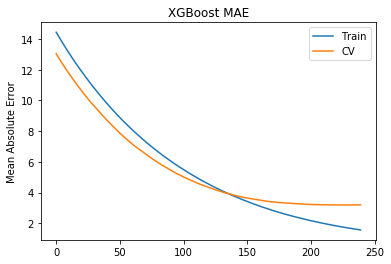

In [79]:
validate_performance(selected_features_1, full_data_1[['date', 'week_1_cases']])

Model with 191 rounds (best) achieved 0.5107158474661957 explained variance and 3.516979872963526 mean absolute error


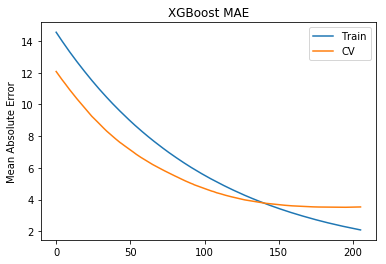

In [80]:
validate_performance(selected_features_2, full_data_2[['date', 'week_2_cases']])

Model with 144 rounds (best) achieved 0.7255942485069403 explained variance and 6.024705130581101 mean absolute error


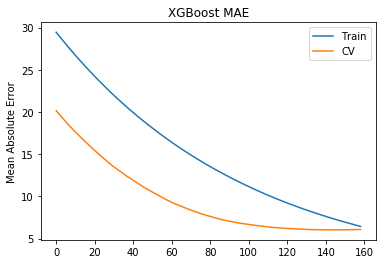

In [78]:
validate_performance(selected_features_2_4, full_data_2_4[['date', 'week_2_to_4_cases']])

Model with 105 rounds (best) achieved 0.4761391828845428 explained variance and 4.9445186831345085 mean absolute error


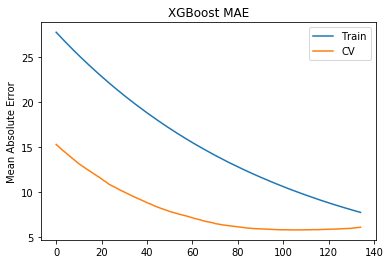

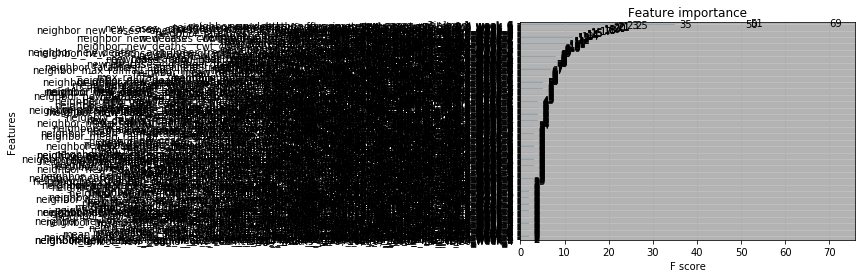

In [69]:
validate_performance(selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']])

Model with 128 rounds (best) achieved 0.6843810801997003 explained variance and 5.234277214064584 mean absolute error


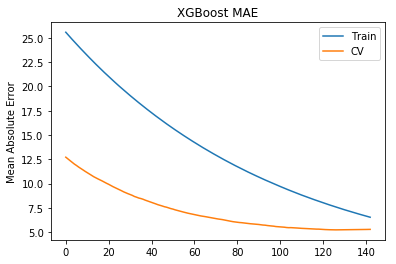

In [77]:
validate_performance(selected_features_6_8, full_data_6_8[['date', 'week_6_to_8_cases']])

In [70]:
fs = FeatureSelector(data = selected_features_4_6.drop(columns='date'), labels = full_data_4_6['week_4_to_6_cases'])

In [71]:
fs.identify_collinear(correlation_threshold=0.95)

4712 features with a correlation magnitude greater than 0.95.



In [72]:
cols_to_keep = set(selected_features_4_6.columns) - set(fs.ops['collinear'])

In [73]:
len(cols_to_keep)

6983

In [74]:
corr_selected_features_4_6 = selected_features_4_6[list(cols_to_keep)]

Model with 122 rounds (best) achieved 0.4901342965485217 explained variance and 5.109041009683568 mean absolute error


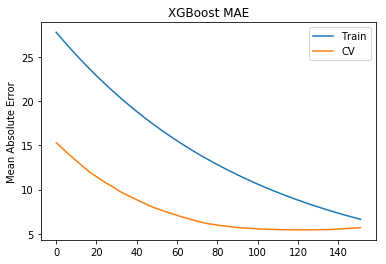

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x0000028648C56E10>>
Traceback (most recent call last):
  File "C:\Users\Rohil\Anaconda3\lib\site-packages\xgboost\core.py", line 868, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


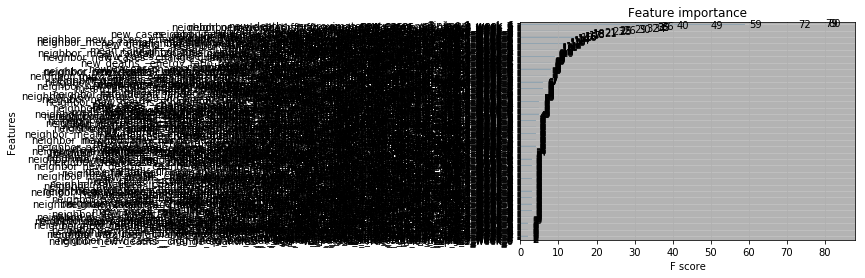

In [89]:
xgb_all_features_4_6 = validate_performance(corr_selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']])

In [ ]:
def compute_feature_importance():
    
    

In [99]:
xgb_all_features_4_6.feature_importances_

array([0.00253807, 0.00228426, 0.00329949, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [96]:
def nfeature_search(X, y, xgb_all_features):
    
    thresholds = sorted(xgb_all_features.feature_importances_, reverse = True)
    
    nfeature_df = pd.DataFrame(columns=['threshold', 'n_features', 'explained_variance', 'mae'])

    y = y.dropna()
    X = X.loc[y.index]
        
    X_train, X_cv, X_test = train_cv_test_split(X)
    y_train, y_cv, y_test = train_cv_test_split(y)

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train, X_cv, X_test = scale_features(scaler, X_train), scale_features(scaler, X_cv), scale_features(scaler, X_test)
        
    for thresh in thresholds[0:100]:
        # select features using threshold
        selection = SelectFromModel(xgb_all_features, threshold=thresh, prefit=True)

        select_X_train, select_X_cv, select_X_test = selection.transform(X_train), selection.transform(X_cv), selection.transform(X_test)
        
        eval_set = [(select_X_train, y_train), (select_X_cv, y_cv)]
        
        selection_model = xgboost.XGBRegressor(n_estimators = 400,
                                              learning_rate= 0.01, 
                                              max_depth= 6, 
                                              min_child_weight= 5,
                                              subsample= 0.6,
                                              colsample_bytree= 0.6,
                                              n_jobs = -1)

        selection_model.fit(select_X_train, y_train, eval_metric='mae', eval_set=eval_set, early_stopping_rounds=30, verbose = 0)

        # eval model
        y_pred = selection_model.predict(select_X_test)
        score = explained_variance_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # eval model
        y_pred = selection_model.predict(select_X_test)
        score = explained_variance_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print('Thresh=%s, n=%s, explained variance: %s, mean abs error: %s' % (thresh, select_X_train.shape[1], score, mae))

        nfeature_df = nfeature_df.append(pd.Series({'threshold':thresh, 'n_features':select_X_train.shape[1], 'explained_variance':score, 'mae': mae}), ignore_index = True)
        
    return (nfeature_df)

In [98]:
nfeature_search(corr_selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']], xgb_all_features_4_6)

Thresh=0.020304568, n=1, explained variance: 0.4040983862265576, mean abs error: 5.510974085447405
Thresh=0.020050762, n=2, explained variance: 0.3226795082411801, mean abs error: 6.587634992510578
Thresh=0.018274112, n=3, explained variance: 0.46919520530762115, mean abs error: 5.9319354366973585
Thresh=0.014974619, n=4, explained variance: 0.5637384264223979, mean abs error: 4.8362402628220496
Thresh=0.012436548, n=5, explained variance: 0.5333059118543872, mean abs error: 5.245779530028357
Thresh=0.010152284, n=6, explained variance: 0.5127057074379375, mean abs error: 5.65367562532315
Thresh=0.009137056, n=7, explained variance: 0.4953462129408186, mean abs error: 5.393800883254341
Thresh=0.008883249, n=9, explained variance: 0.4843977037723681, mean abs error: 5.3165181607752166
Thresh=0.008883249, n=9, explained variance: 0.4843977037723681, mean abs error: 5.3165181607752166
Thresh=0.008629441, n=10, explained variance: 0.45202594155687226, mean abs error: 5.654544472679283
Thre

,threshold,n_features,explained_variance,mae
0,0.020305,1.0,0.404098,5.510974
1,0.020051,2.0,0.322680,6.587635
2,0.018274,3.0,0.469195,5.931935
3,0.014975,4.0,0.563738,4.836240
4,0.012437,5.0,0.533306,5.245780
5,0.010152,6.0,0.512706,5.653676
6,0.009137,7.0,0.495346,5.393801
7,0.008883,9.0,0.484398,5.316518
8,0.008883,9.0,0.484398,5.316518
9,0.008629,10.0,0.452026,5.654544


In [124]:
def recursive_feature_elimination(X, y):
    
    X_train, X_cv, X_test = train_cv_test_split(X)
    y_train, y_cv, y_test = train_cv_test_split(y)

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train, X_cv, X_test = scale_features(scaler, X_train), scale_features(scaler, X_cv), scale_features(scaler, X_test)
    
    eval_set = [(X_cv, y_cv)]

    model = xgboost.XGBRegressor( n_estimators = 100,
                                  learning_rate= 0.01, 
                                  max_depth= 6, 
                                  min_child_weight= 5,
                                  subsample= 0.6,
                                  colsample_bytree= 0.6,
                                  n_jobs = -1,
                                  verbose = True)
    
    
    rfe = RFE(estimator=model, step=0.025, n_features_to_select=400, verbose = True)
    
    X_transformed = rfe.fit_transform(X_train, y_train)
    
    preds = rfe.estimator_.predict(rfe.transform(X_cv))
    
    print ("Explained variance of best estimator on cv set: " + str(explained_variance_score(y_cv, preds)))
    print ("Mae of best estimator on cv set: " + str(mean_absolute_error(y_cv, preds)))
    
    return (rfe, X_transformed)

In [125]:
rfe_4_6, top_300_corr_selected_features_4_6 = recursive_feature_elimination(corr_selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']])

C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 8460 features.
Fitting estimator with 8249 features.
Fitting estimator with 8038 features.
Fitting estimator with 7827 features.
Fitting estimator with 7616 features.
Fitting estimator with 7405 features.
Fitting estimator with 7194 features.
Fitting estimator with 6983 features.
Fitting estimator with 6772 features.
Fitting estimator with 6561 features.
Fitting estimator with 6350 features.
Fitting estimator with 6139 features.
Fitting estimator with 5928 features.
Fitting estimator with 5717 features.
Fitting estimator with 5506 features.
Fitting estimator with 5295 features.
Fitting estimator with 5084 features.
Fitting estimator with 4873 features.
Fitting estimator with 4662 features.
Fitting estimator with 4451 features.
Fitting estimator with 4240 features.
Fitting estimator with 4029 features.
Fitting estimator with 3818 features.
Fitting estimator with 3607 features.
Fitting estimator with 3396 features.
Fitting estimator with 3185 features.
Fitting esti

array([False,  True,  True, ..., False, False, False])

In [151]:
top_400_corr_selected_features_4_6_with_date = pd.concat([pd.DataFrame(corr_selected_features_4_6.iloc[:,rfe_4_6.support_]).reset_index(drop=True), full_data_4_6['date'].reset_index(drop=True)], axis = 1)

In [ ]:
validate_performance(top_400_corr_selected_features_4_6_with_date, full_data_4_6[['date', 'week_4_to_6_cases']])

In [ ]:
validate_performance(corr_selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']])

In [104]:
def recursive_feature_elimination_cv(X, y):
    
    X_train, X_cv, X_test = train_cv_test_split(X)
    y_train, y_cv, y_test = train_cv_test_split(y)

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train, X_cv, X_test = scale_features(scaler, X_train), scale_features(scaler, X_cv), scale_features(scaler, X_test)
    
    X_train_cv = X_train.append(X_cv)
    y_train_cv = y_train.append(y_cv)
        
    model = xgboost.XGBRegressor( n_estimators = 100,
                                  learning_rate= 0.02, 
                                  max_depth= 6, 
                                  min_child_weight= 5,
                                  subsample= 0.6,
                                  colsample_bytree= 0.6,
                                  n_jobs = -1,
                                  verbose = True)
    
    rfecv = RFECV(estimator=model, step=1, cv=TimeSeriesSplit(n_splits = 2), scoring='neg_mean_absolute_error', verbose = True)
    
    X_transformed = rfecv.fit_transform(X_train_cv, y_train_cv)
    
    return (rfecv, X_transformed)

In [105]:
rfe_cv_4_6, rfecv_corr_selected_features_4_6 = recursive_feature_elimination_cv(top_300_corr_selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']])

AttributeError: 'numpy.ndarray' object has no attribute 'date'

In [98]:
rfe_cv_4_6.n_features_

5940

In [99]:
rfe_cv_4_6.grid_scores_

array([-9.8009625 , -8.49191008, -8.51256366, -8.68192075, -8.50451276,
       -8.50592739, -8.4489738 , -8.46893585, -8.60323053, -8.521707  ,
       -8.47739735, -8.66692566, -8.50494092, -8.56849315, -8.60625503,
       -8.42292299, -8.52482796, -8.36067393, -8.41456494, -8.48986411,
       -8.60424172, -8.67264694, -8.54689756, -8.59647079, -8.61582297,
       -8.41805104, -8.70945577, -8.63681052, -8.51835222, -8.57243745,
       -8.47170781, -8.54271542, -8.47294405, -8.47305425, -8.56125282,
       -8.60831407, -8.66569748, -8.54690811, -8.370989  , -8.62553532,
       -8.45682115, -8.74424422, -8.46295634, -8.63334617, -8.44414911,
       -8.47984463, -8.60177899, -8.55790743, -8.54177813, -8.41738053,
       -8.61872565, -8.55861177, -8.58063865, -8.63228302, -8.50152587,
       -8.54346653, -8.71772071, -8.60402297, -8.69183424, -8.52701141,
       -8.50405597, -8.5464978 , -8.64418775, -8.59522273, -8.63699753,
       -8.46796934, -8.69337075, -8.50946311, -8.57504173, -8.68

In [52]:
def get_feature_importances(X, y, param_grid):

    y = y.dropna().drop('date', axis=1)
    X = X.loc[y.index].drop('date', axis=1)    

    scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)

    tscv = TimeSeriesSplit(n_splits=3, max_train_size = 1500)

    model = xgboost.XGBRegressor(tree_method = 'gpu_hist', objective= 'gpu:reg:linear', gpu_id = 0)

    grid_search = GridSearchCV(model,
                        param_grid = param_grid,
                        cv = tscv.split(X_scaled),
                        scoring = 'explained_variance',
                        verbose=True)


    grid_search.fit(X_scaled, y)

    print (grid_search.best_params_)

    return(grid_search.best_estimator_, grid_search.cv_results_)

In [62]:
all_feature_param_grid = {'learning_rate': [0.001, 0.01], 
              'max_depth': [2,4,6],
              'min_child_weight': [3,5,7],
              'subsample': [0.4, 0.6],
              'colsample_bytree': [0.4, 0.6],
              'n_estimators': [150, 300]
}

In [54]:
all_feature_param_grid_done = {'learning_rate': [0.1], 
              'max_depth': [12],
              'min_child_weight': [45],
              'subsample': [0.5],
              'colsample_bytree': [0.5],
              'n_estimators': [300],
}

In [58]:
# all_feature_params = { 'objective':'reg:linear',
#               'learning_rate': 0.01, #so called `eta` value
#               'max_depth': 10,
#               'min_child_weight':40,
#               'subsample':.6,
#               'colsample_bytree':.6,
#               'n_estimators':500}

In [47]:
week1_xgb_full_features, week1_xgb_cv_results = get_feature_importances(selected_features_1, full_data_1[['date', 'week_1_cases']], all_feature_param_grid_done)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: 

In [56]:
week2_xgb_full_features, week2_xgb_cv_results = get_feature_importances(selected_features_2, full_data_2[['date', 'week_2_cases']], all_feature_param_grid)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [87]:
week2_4_xgb_full_features, week2_4_xgb_cv_results = get_feature_importances(selected_features_2_4, full_data_2_4[['date', 'week_2_to_4_cases']], all_feature_param_grid)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 180.9min finished


{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 50, 'n_estimators': 300, 'subsample': 0.5}


In [63]:
week4_6_xgb_full_features, week4_6_xgb_cv_results = get_feature_importances(selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']], all_feature_param_grid)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed: 459.7min finished


{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.4}


In [65]:
pd.DataFrame(week4_6_xgb_cv_results)

C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,18.047515,1.616580,0.267216,0.002792,0.4,0.001,2,3,150,0.4,...,0.154820,0.150928,0.170020,0.024300,141,0.186214,0.189393,0.199459,0.191689,0.005645
1,18.587359,1.057784,0.270236,0.002655,0.4,0.001,2,3,150,0.6,...,0.145721,0.156206,0.170285,0.027658,137,0.187798,0.191537,0.200866,0.193400,0.005496
2,31.147802,2.034551,0.270858,0.000594,0.4,0.001,2,3,300,0.4,...,0.264408,0.266275,0.291553,0.037076,99,0.331772,0.335113,0.354420,0.340435,0.009983
3,31.279783,2.084298,0.273065,0.003620,0.4,0.001,2,3,300,0.6,...,0.249348,0.274123,0.291107,0.042751,101,0.333402,0.337786,0.356796,0.342661,0.010154
4,19.026325,1.132275,0.266364,0.000800,0.4,0.001,2,5,150,0.4,...,0.154820,0.150928,0.170063,0.024361,139,0.186274,0.189393,0.199459,0.191709,0.005626
5,18.913591,1.091152,0.269063,0.002708,0.4,0.001,2,5,150,0.6,...,0.145721,0.156206,0.170285,0.027658,137,0.187798,0.191537,0.200866,0.193400,0.005496
6,31.398578,2.214502,0.270582,0.000489,0.4,0.001,2,5,300,0.4,...,0.264408,0.266275,0.291645,0.037207,98,0.331856,0.335113,0.354420,0.340463,0.009958
7,31.273631,2.076970,0.273259,0.003560,0.4,0.001,2,5,300,0.6,...,0.249348,0.274123,0.291107,0.042751,101,0.333402,0.337786,0.356796,0.342661,0.010154
8,18.738720,1.095141,0.265742,0.001083,0.4,0.001,2,7,150,0.4,...,0.154820,0.150928,0.170063,0.024361,139,0.186274,0.189393,0.199459,0.191709,0.005626
9,18.882265,1.131046,0.265634,0.000948,0.4,0.001,2,7,150,0.6,...,0.145721,0.156206,0.170321,0.027708,133,0.187886,0.191537,0.200866,0.193430,0.005465


In [64]:
week6_8_xgb_full_features, week6_8_xgb_cv_results = get_feature_importances(selected_features_6_8, full_data_6_8[['date', 'week_6_to_8_cases']], all_feature_param_grid)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


KeyboardInterrupt: 

In [96]:
pd.DataFrame(week2_4_xgb_cv_results).to_csv('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/tsfresh_feature_importances/week2_4_all_feature_cv_results.csv', index = False)

C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\util

In [66]:
pd.DataFrame(week4_6_xgb_cv_results).to_csv('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/tsfresh_feature_importances/week4_6_all_feature_cv_results_2.csv', index = False)

C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\util

In [97]:
pd.DataFrame(week6_8_xgb_cv_results).to_csv('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/tsfresh_feature_importances/week6_8_all_feature_cv_results.csv', index = False)

C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohil\Anaconda3\lib\site-packages\sklearn\util

In [552]:
model_dict = {'week1_xgb' : week1_xgb_full_features, 'week2_xgb' : week2_xgb_full_features, 'week2_to_4_xgb' : week2_4_xgb_full_features, 'week4_to_6_xgb' : week4_6_xgb_full_features, 'week6_to_8_xgb' : week6_8_xgb_full_features}

In [534]:
week6_8_xgb_full_features

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=10, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

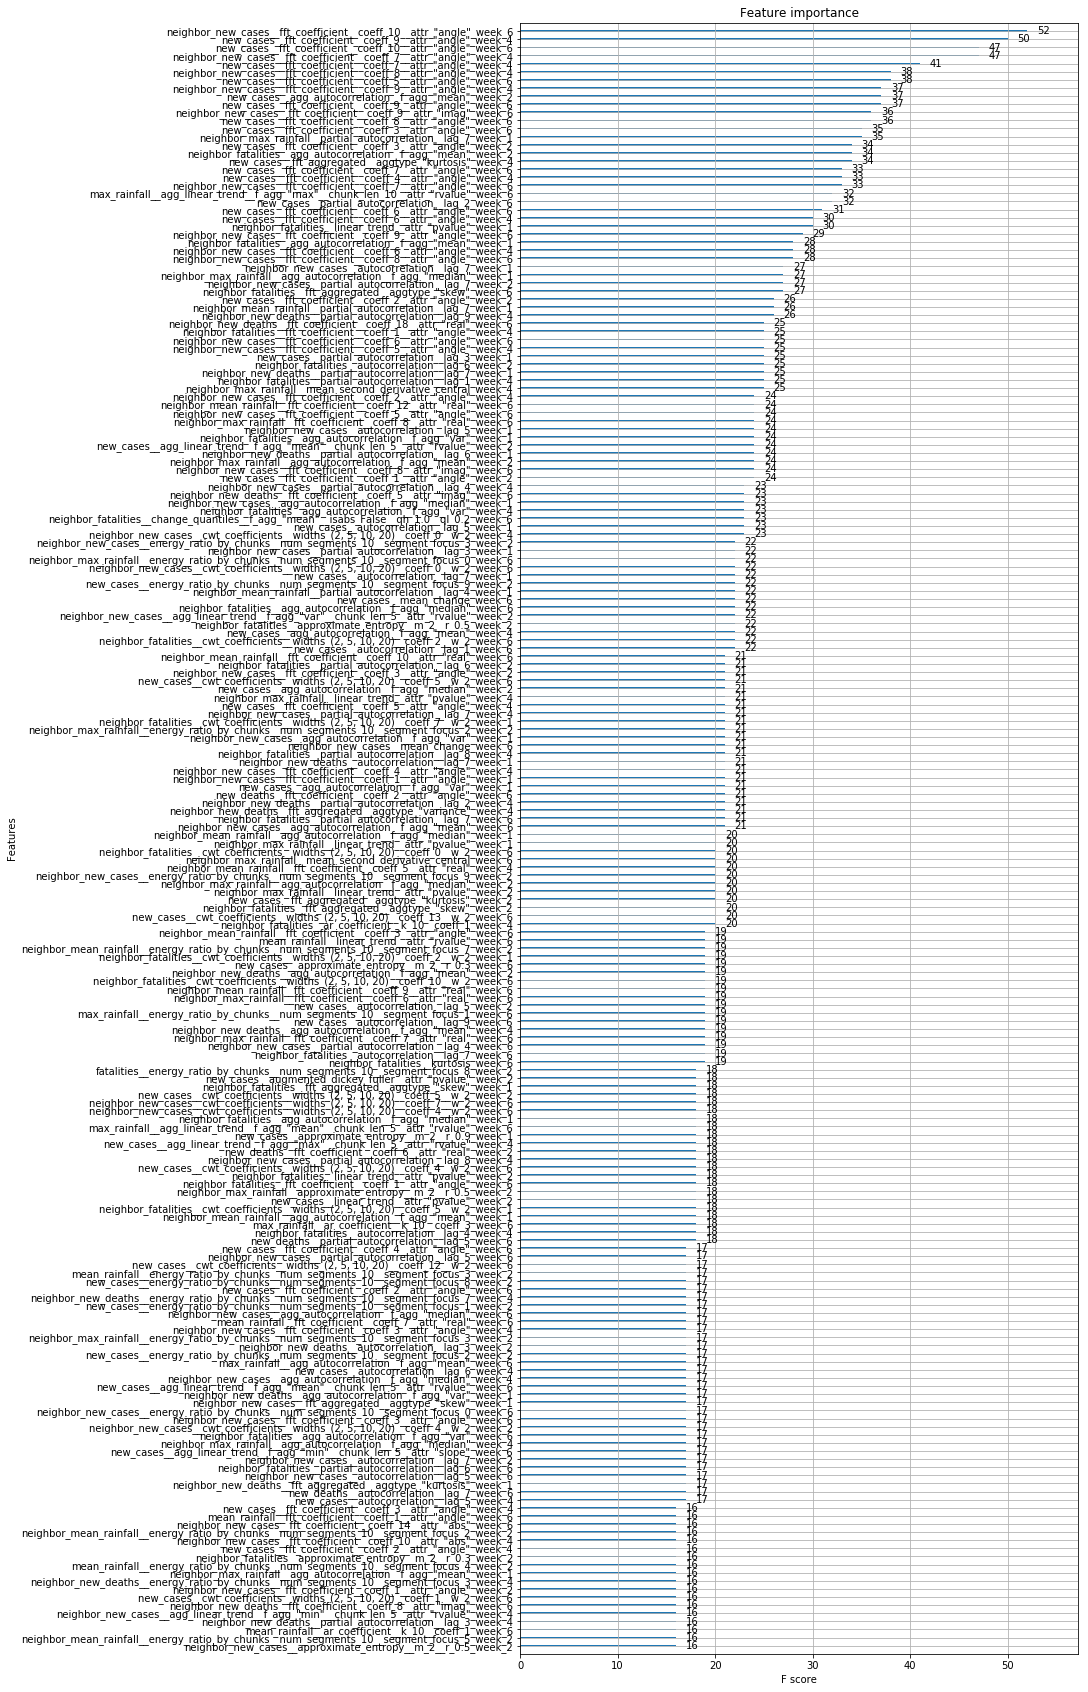

In [537]:
fig1, ax1 = plt.subplots(1,1, figsize = (10, 30))
xgboost.plot_importance(week6_8_xgb_full_features, ax=ax1, max_num_features = 200)

In [553]:
for key, val in model_dict.items():
    fig, ax = plt.subplots(1,1, figsize = (10, 40))
    xgboost.plot_importance(val, ax=ax, max_num_features = 300)
    fig.tight_layout()
    fig.savefig('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/tsfresh_feature_importances/fdr_lvl 0.001/' + key + '.png')
    plt.clf()
    plt.close('all')

In [465]:
def get_feature_importances_pt2(X, y, xgb_all_features, model_params):
    
    scaler = StandardScaler()
        
    top300 = pd.Series(xgb_all_features.feature_importances_, X.drop('date', axis=1).columns).sort_values(ascending = False).head(300).index
    
    selection_model = xgboost.XGBRegressor(**model_params)

    select_X = X[top300]
    
    select_X_scaled = pd.DataFrame(scaler.fit_transform(select_X), columns = select_X.columns)

    selection_model.fit(select_X_scaled, y.drop('date', axis=1))

    return (selection_model)

In [466]:
week1_xgb_top300_features = get_feature_importances_pt2(selected_features_1, full_data_1[['date', 'week_1_cases']], week1_xgb_full_features, all_feature_params)
week2_xgb_top300_features = get_feature_importances_pt2(selected_features_2, full_data_2[['date', 'week_2_cases']], week2_xgb_full_features, all_feature_params)
week2_4_xgb_top300_features = get_feature_importances_pt2(selected_features_2_4, full_data_2_4[['date', 'week_2_to_4_cases']], week2_4_xgb_full_features, all_feature_params)
week4_6_xgb_top300_features = get_feature_importances_pt2(selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']], week4_6_xgb_full_features, all_feature_params)
week6_8_xgb_top300_features = get_feature_importances_pt2(selected_features_6_8, full_data_6_8[['date', 'week_6_to_8_cases']], week6_8_xgb_full_features, all_feature_params)

In [467]:
model_dict_top300_features = {'week1_xgb' : week1_xgb_top300_features, 'week2_xgb' : week2_xgb_top300_features, 'week2_to_4_xgb' : week2_4_xgb_top300_features, 'week4_to_6_xgb' : week4_6_xgb_top300_features, 'week6_to_8_xgb' : week6_8_xgb_top300_features}

In [468]:
for key, val in model_dict_top300_features.items():
    fig, ax = plt.subplots(1,1, figsize = (10, 40))
    xgboost.plot_importance(val, ax=ax, max_num_features = 300)
    fig.tight_layout()
    fig.savefig('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/tsfresh_feature_importances/reranked top300 (fdr_lvl 0.001)/' + key + '.png')
    plt.clf()
    plt.close('all')

In [472]:
# there was no significant difference in the re-ranking, so not worrying about that anymore

In [483]:
def nfeature_search(X, y, xgb_all_features, max_training_size):
    
    thresholds = sorted(xgb_all_features.feature_importances_, reverse = True)
    
    nfeature_df = pd.DataFrame()

    # some of the ending values are undefined purposely, as there isnt't enough data to get cholera cases for x weeks
    y = y.dropna().drop('date', axis=1)
    X = X.loc[y.index].drop('date', axis=1)
        
    #X_train, X_test = X[(X.date<split_date)].drop('date', axis=1), X[(X.date>=split_date)].drop('date', axis=1)
    #y_train, y_test = y[(y.date<split_date)].drop('date', axis=1), y[(y.date>=split_date)].drop('date', axis=1)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    #X_train, X_test = scale_features(scaler, X_train), scale_features(scaler, X_test)
    
    tscv = TimeSeriesSplit(n_splits=3, max_train_size = max_training_size)
    
    for thresh in thresholds[0:100]:
        # select features using threshold
        selection = SelectFromModel(xgb_all_features, threshold=thresh, prefit=True)
        
        ev_list = []
        mae_list = []
        
        for train_index, test_index in tscv.split(X):

            #To get the indices 
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            select_X_train = selection.transform(X_train)
        
            selection_model = xgboost.XGBRegressor()

            selection_model.fit(select_X_train, y_train)

            # eval model
            select_X_test = selection.transform(X_test)
            y_pred = selection_model.predict(select_X_test)
            score = explained_variance_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            ev_list.append(score)
            mae_list.append(mae)

        print('Thresh=%s, n=%s, explained variance: %s, mean abs error: %s' % (thresh, select_X_train.shape[1], np.mean(ev_list), np.mean(mae_list)))
        print('explained variance for each split: ' + str(ev_list) + ', mae for each split: ' + str(mae_list))
        nfeature_df = nfeature_df.append(pd.Series({'threshold':thresh, 'n_features':select_X_train.shape[1], 'explained_variances':ev_list, 'mean_abs_errors': mae_list, 'mean_explained_variance':np.mean(ev_list), 'mean_mae': np.mean(mae_list)}), ignore_index = True)
    
    return (nfeature_df)  
   

In [484]:
# all_feature_params_v2 = {'nthread':4, #when use hyperthread, xgboost may become slower
#               'objective':'reg:linear',
#               'learning_rate': 0.01, #so called `eta` value
#               'max_depth': 12,
#               'min_child_weight': 40,
#               'silent':1,
#               'subsample':.4,
#               'colsample_bytree':.4,
#               'n_estimators':500}

In [485]:
# all_feature_params_v3 = {
#               'learning_rate': 0.1, #so called `eta` value
#               'max_depth': 8,
#               'min_child_weight':5,
#               'subsample':.7,
#               'colsample_bytree':.7,
#               'n_estimators':300}

In [554]:
feature_search_params = {
              'learning_rate': 0.1, #so called `eta` value
              'max_depth': 7,
              'min_child_weight':7,
              'subsample':.7,
              'colsample_bytree':.7,
              'n_estimators':250 
}

In [486]:
week1_nfeature_search = nfeature_search(selected_features_1, full_data_1[['date', 'week_1_cases']], week1_xgb_full_features, 500)

Thresh=0.007964486, n=1, explained variance: 0.6681923394840362, mean abs error: 2.194252280811377
explained variance for each split: [0.608763281483014, 0.6870541946258941, 0.7087595423432007], mae for each split: [3.659079365224065, 2.058542931948528, 0.8651345452615372]
Thresh=0.0059189624, n=2, explained variance: 0.699774322714604, mean abs error: 1.9070041614543065
explained variance for each split: [0.6994467141552781, 0.8194284340081521, 0.5804478199803815], mae for each split: [3.3127319909531394, 1.470586449909126, 0.937694043500654]
Thresh=0.0057013533, n=3, explained variance: 0.7472128662753234, mean abs error: 1.8023440593596842
explained variance for each split: [0.6950810971272854, 0.8563915287421398, 0.6901659729565452], mae for each split: [3.255742978217624, 1.3768078421696845, 0.7744813576917445]
Thresh=0.0053096577, n=4, explained variance: 0.7666194506675575, mean abs error: 1.7643045742057024
explained variance for each split: [0.7043600860481143, 0.8751822197105

explained variance for each split: [0.7202773942867498, 0.8956015317017736, 0.7467707088839806], mae for each split: [3.255362349044774, 1.3811815834137215, 0.7973705497046513]
Thresh=0.0013491752, n=60, explained variance: 0.7875498782908347, mean abs error: 1.8113048273877157
explained variance for each split: [0.7202773942867498, 0.8956015317017736, 0.7467707088839806], mae for each split: [3.255362349044774, 1.3811815834137215, 0.7973705497046513]
Thresh=0.0013056535, n=63, explained variance: 0.7812292683496457, mean abs error: 1.868137747505427
explained variance for each split: [0.7185376128073603, 0.8857891391141062, 0.7393610531274706], mae for each split: [3.3545828547099514, 1.4413408131283947, 0.8084895746779345]
Thresh=0.0013056535, n=63, explained variance: 0.7812292683496457, mean abs error: 1.868137747505427
explained variance for each split: [0.7185376128073603, 0.8857891391141062, 0.7393610531274706], mae for each split: [3.3545828547099514, 1.4413408131283947, 0.8084

KeyboardInterrupt: 

In [ ]:
week2_nfeature_search = nfeature_search(selected_features_2, full_data_2[['date', 'week_2_cases']], week2_xgb_top300_features, 500)

In [579]:
week2_4_nfeature_search = nfeature_search(selected_features_2_4, full_data_2_4[['date', 'week_2_to_4_cases']], week2_4_xgb_full_features, 1000)

Thresh=0.0021742368, n=1, explained variance: -0.09800813094437033, mean abs error: 14.025086851349068
explained variance for each split: [-0.06746593406017531, -0.14592636008869264, -0.08063209868424304], mae for each split: [18.42905704855494, 16.487581629767877, 7.158621875724384]
Thresh=0.0020551006, n=2, explained variance: -0.10966262750690015, mean abs error: 13.546004866746827
explained variance for each split: [-0.10249397833888652, -0.1392517329128542, -0.08724217126895972], mae for each split: [18.525756122059047, 16.195815460603484, 5.916443017577948]
Thresh=0.0019955323, n=3, explained variance: -0.12640553812984426, mean abs error: 13.618561679091924
explained variance for each split: [-0.10412206604941687, -0.20234342096857194, -0.07275112737154399], mae for each split: [18.54381616366812, 16.452913469632588, 5.858955403975067]
Thresh=0.0019061802, n=4, explained variance: -0.1245986275948574, mean abs error: 13.674798477263396
explained variance for each split: [-0.1222

KeyboardInterrupt: 

In [555]:
week4_6_nfeature_search = nfeature_search(selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']], week4_6_xgb_full_features, 1000)

Thresh=0.018384207, n=1, explained variance: -0.13107604717247612, mean abs error: 12.89366734037869
explained variance for each split: [-0.07655953589627806, -0.24447216126270188, -0.07219644435844841], mae for each split: [17.49413548376318, 15.563150844507744, 5.623715692865143]
Thresh=0.0019866296, n=2, explained variance: -0.16936837689145512, mean abs error: 13.12614210726815
explained variance for each split: [-0.0805343424448326, -0.2555137631907689, -0.17205702503876386], mae for each split: [17.486623818902213, 15.681711983107284, 6.210090519794952]
Thresh=0.0017658931, n=4, explained variance: -0.15139512679913047, mean abs error: 13.202887108861551
explained variance for each split: [-0.043336677396312195, -0.25971870157379695, -0.15113000142728228], mae for each split: [17.620084570179813, 15.778740576002205, 6.209836180402633]
Thresh=0.0017658931, n=4, explained variance: -0.15139512679913047, mean abs error: 13.202887108861551
explained variance for each split: [-0.04333

KeyboardInterrupt: 

In [557]:
week6_8_nfeature_search = nfeature_search(selected_features_6_8, full_data_6_8[['date', 'week_6_to_8_cases']], week6_8_xgb_full_features, 1000)

Thresh=0.0018307093, n=1, explained variance: -0.07410562174768416, mean abs error: 11.75870614350066
explained variance for each split: [-0.09823835477246545, -0.11166786826906971, -0.01241064220151733], mae for each split: [16.669677034536296, 13.06664465951524, 5.539796736450448]
Thresh=0.0017308524, n=2, explained variance: -0.07580932061863373, mean abs error: 11.818200802712113
explained variance for each split: [-0.09890806479177638, -0.11873916057624911, -0.009780736487875696], mae for each split: [16.77327728208039, 13.17098282109974, 5.510342304956208]
Thresh=0.0016309955, n=5, explained variance: -0.0682237530080659, mean abs error: 11.781414061820215
explained variance for each split: [-0.06280330565511072, -0.1522161659413308, 0.010348212572243831], mae for each split: [16.683190645902872, 13.485821204629376, 5.175230334928394]
Thresh=0.0016309955, n=5, explained variance: -0.0682237530080659, mean abs error: 11.781414061820215
explained variance for each split: [-0.062803

KeyboardInterrupt: 

In [387]:
week1_nfeature_search.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\nfeature_search\week1_nfeature_search.csv', index = False)
week2_nfeature_search.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\nfeature_search\week2_nfeature_search.csv', index = False)
week2_4_nfeature_search.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\nfeature_search\week2_4_nfeature_search.csv', index = False)
week4_6_nfeature_search.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\nfeature_search\week4_6_nfeature_search.csv', index = False)
week6_8_nfeature_search.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\nfeature_search\week6_8_nfeature_search.csv', index = False)

In [473]:
def feature_gridsearch(X, y, split_date, param_grid, xgb_all_features, thresh):
    
    y = y.dropna()
    X = X.loc[y.index]
    
    X_train, X_test = X[(X.date<split_date)].drop('date', axis=1), X[(X.date>=split_date)].drop('date', axis=1)
    y_train, y_test = y[(y.date<split_date)].drop('date', axis=1), y[(y.date>=split_date)].drop('date', axis=1)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train, X_test = scale_features(scaler, X_train), scale_features(scaler, X_test)
        
    tscv = TimeSeriesSplit(n_splits=4, max_train_size = max_training_size)
        
    # select features using threshold
    selection = SelectFromModel(xgb_all_features, threshold=thresh, prefit=True)

    select_X_train = selection.transform(X_train)

    selection_model = xgboost.XGBRegressor()

    grid_search = GridSearchCV(selection_model,
                        param_grid = param_grid,
                        cv = tscv.split(select_X_train),
                        n_jobs = -1,
                        scoring = 'explained_variance',
                        verbose=True)

    grid_search.fit(select_X_train, y_train)

    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = grid_search.predict(select_X_test)
    score = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return(grid_search.best_score_, grid_search.best_params_)

In [179]:
param_grid = {'learning_rate': [0.01, 0.05, 0.1], #so called `eta` value
              'max_depth': [4,6,8,10,12],
              'min_child_weight': [25, 40, 55],
              'subsample': [0.5, 0.6, 0.7, 0.8],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
              'n_estimators': [100, 200, 300, 400],
}

In [180]:
week1_nfeature_gridsearch = nfeature_gridsearch(selected_features_1, full_data_1[['date', 'week_1_cases']], nfeature_param_grid, '2017-09-25', week1_xgb_full_features)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.3min finished


Thresh=0.010652921, n=1, explained variance: 0.7953678670026572, mean abs error: 2.004755409073782
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.4min finished


Thresh=0.009163803, n=2, explained variance: 0.8287170504893081, mean abs error: 1.7068932378259538
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.4min finished


Thresh=0.0077892323, n=3, explained variance: 0.8428272798799419, mean abs error: 1.3239704309853493
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.6min finished


Thresh=0.0064719357, n=4, explained variance: 0.8545978717639621, mean abs error: 1.296587206502442
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.7min finished


Thresh=0.006185567, n=5, explained variance: 0.8376958704321685, mean abs error: 1.333230888046659
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.8min finished


Thresh=0.0058419243, n=6, explained variance: 0.8410582843428394, mean abs error: 1.3082244028588204
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.9min finished


Thresh=0.005784651, n=7, explained variance: 0.8468620549910384, mean abs error: 1.2189858042268755
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.2min finished


Thresh=0.005727377, n=8, explained variance: 0.8488407850965105, mean abs error: 1.198209283049809
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.4min finished


Thresh=0.0045246277, n=9, explained variance: 0.8465975487546823, mean abs error: 1.2048302561585469
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.4min finished


Thresh=0.0042955326, n=10, explained variance: 0.8444093254124447, mean abs error: 1.2020652589331733
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.5min finished


Thresh=0.004180985, n=11, explained variance: 0.8420410082987273, mean abs error: 1.2076655191956027
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.0041237115, n=12, explained variance: 0.8416496154158425, mean abs error: 1.2122879367668373
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.8min finished


Thresh=0.0040664375, n=14, explained variance: 0.845880823966873, mean abs error: 1.2015831992075285
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.0040664375, n=14, explained variance: 0.845880823966873, mean abs error: 1.2015831992075285
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.004009164, n=15, explained variance: 0.8466416195450437, mean abs error: 1.1876206257359565
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.8min finished


Thresh=0.0038373426, n=16, explained variance: 0.8409073591493389, mean abs error: 1.2016266509810778
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.003722795, n=17, explained variance: 0.8368746743936922, mean abs error: 1.2192624691519232
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.0036082475, n=18, explained variance: 0.8404488462606381, mean abs error: 1.2089331107973076
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.0min finished


Thresh=0.0034937, n=19, explained variance: 0.8410769502025397, mean abs error: 1.2022384318556658
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.1min finished


Thresh=0.0034364262, n=20, explained variance: 0.8396507038204525, mean abs error: 1.206407940133725
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.2min finished


Thresh=0.0033218786, n=22, explained variance: 0.8461212002652021, mean abs error: 1.247684916101443
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.2min finished


Thresh=0.0033218786, n=22, explained variance: 0.8461212002652021, mean abs error: 1.247684916101443
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.3min finished


Thresh=0.0032646048, n=24, explained variance: 0.8383763335011771, mean abs error: 1.270055737297321
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.3min finished


Thresh=0.0032646048, n=24, explained variance: 0.8383763335011771, mean abs error: 1.270055737297321
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.003207331, n=28, explained variance: 0.8434696547088364, mean abs error: 1.2448893673001908
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.003207331, n=28, explained variance: 0.8434696547088364, mean abs error: 1.2448893673001908
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.003207331, n=28, explained variance: 0.8434696547088364, mean abs error: 1.2448893673001908
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.003207331, n=28, explained variance: 0.8434696547088364, mean abs error: 1.2448893673001908
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.6min finished


Thresh=0.0031500573, n=31, explained variance: 0.8465857288234422, mean abs error: 1.255941955943848
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.6min finished


Thresh=0.0031500573, n=31, explained variance: 0.8465857288234422, mean abs error: 1.255941955943848
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.6min finished


Thresh=0.0031500573, n=31, explained variance: 0.8465857288234422, mean abs error: 1.255941955943848
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.8min finished


Thresh=0.002978236, n=34, explained variance: 0.8482064580138715, mean abs error: 1.2779294143140123
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.002978236, n=34, explained variance: 0.8482064580138715, mean abs error: 1.2779294143140123
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.8min finished


Thresh=0.002978236, n=34, explained variance: 0.8482064580138715, mean abs error: 1.2779294143140123
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.0028636884, n=36, explained variance: 0.8408624482648617, mean abs error: 1.342401966510997
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.0028636884, n=36, explained variance: 0.8408624482648617, mean abs error: 1.342401966510997
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.0min finished


Thresh=0.0028064146, n=37, explained variance: 0.8435493582747933, mean abs error: 1.351341892814282
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.1min finished


Thresh=0.0027491408, n=38, explained variance: 0.8400640066241082, mean abs error: 1.3539579459625708
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.1min finished


Thresh=0.0026345933, n=39, explained variance: 0.8452963312652477, mean abs error: 1.3333627102618522
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.3min finished


Thresh=0.0025200457, n=42, explained variance: 0.8410722296537074, mean abs error: 1.3295558946048438
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.3min finished


Thresh=0.0025200457, n=42, explained variance: 0.8410722296537074, mean abs error: 1.3295558946048438
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.3min finished


Thresh=0.0025200457, n=42, explained variance: 0.8410722296537074, mean abs error: 1.3295558946048438
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.002462772, n=44, explained variance: 0.8410582207487067, mean abs error: 1.333331624777695
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.002462772, n=44, explained variance: 0.8410582207487067, mean abs error: 1.333331624777695
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.5min finished


Thresh=0.0024054982, n=46, explained variance: 0.8404477512066182, mean abs error: 1.3362777707011848
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.5min finished


Thresh=0.0024054982, n=46, explained variance: 0.8404477512066182, mean abs error: 1.3362777707011848
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.6min finished


Thresh=0.0023482244, n=47, explained variance: 0.8460036340233583, mean abs error: 1.3256724051793853
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0022909509, n=49, explained variance: 0.850163949996423, mean abs error: 1.3082197923677104
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0022909509, n=49, explained variance: 0.850163949996423, mean abs error: 1.3082197923677104
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.9min finished


Thresh=0.0021764033, n=52, explained variance: 0.8481561154948409, mean abs error: 1.3120441255837243
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.9min finished


Thresh=0.0021764033, n=52, explained variance: 0.8481561154948409, mean abs error: 1.3120441255837243
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.9min finished


Thresh=0.0021764033, n=52, explained variance: 0.8481561154948409, mean abs error: 1.3120441255837243
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.1min finished


Thresh=0.0021191295, n=56, explained variance: 0.8503398330545894, mean abs error: 1.3060857505827934
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.2min finished


Thresh=0.0021191295, n=56, explained variance: 0.8503398330545894, mean abs error: 1.3060857505827934
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.3min finished


Thresh=0.0021191295, n=56, explained variance: 0.8503398330545894, mean abs error: 1.3060857505827934
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.1min finished


Thresh=0.0021191295, n=56, explained variance: 0.8503398330545894, mean abs error: 1.3060857505827934
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.2min finished


Thresh=0.0020618557, n=58, explained variance: 0.8439938342014828, mean abs error: 1.3129229774805267
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.2min finished


Thresh=0.0020618557, n=58, explained variance: 0.8439938342014828, mean abs error: 1.3129229774805267
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.4min finished


Thresh=0.002004582, n=61, explained variance: 0.8478652843908591, mean abs error: 1.3215672442332425
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.4min finished


Thresh=0.002004582, n=61, explained variance: 0.8478652843908591, mean abs error: 1.3215672442332425
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.4min finished


Thresh=0.002004582, n=61, explained variance: 0.8478652843908591, mean abs error: 1.3215672442332425
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019473081, n=66, explained variance: 0.8520254209100987, mean abs error: 1.3141782023526336
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019473081, n=66, explained variance: 0.8520254209100987, mean abs error: 1.3141782023526336
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019473081, n=66, explained variance: 0.8520254209100987, mean abs error: 1.3141782023526336
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019473081, n=66, explained variance: 0.8520254209100987, mean abs error: 1.3141782023526336
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019473081, n=66, explained variance: 0.8520254209100987, mean abs error: 1.3141782023526336
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.0min finished


Thresh=0.0018900344, n=70, explained variance: 0.8414843874888147, mean abs error: 1.3067586519697296
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.0min finished


Thresh=0.0018900344, n=70, explained variance: 0.8414843874888147, mean abs error: 1.3067586519697296
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.0min finished


Thresh=0.0018900344, n=70, explained variance: 0.8414843874888147, mean abs error: 1.3067586519697296
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.0min finished


Thresh=0.0018900344, n=70, explained variance: 0.8414843874888147, mean abs error: 1.3067586519697296
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.1min finished


Thresh=0.0018327606, n=72, explained variance: 0.8495532349743667, mean abs error: 1.2966382912965464
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.2min finished


Thresh=0.0018327606, n=72, explained variance: 0.8495532349743667, mean abs error: 1.2966382912965464
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.5min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.6min finished


Thresh=0.0017754869, n=80, explained variance: 0.8555535284632152, mean abs error: 1.2843500998066169


In [181]:
week2_nfeature_gridsearch = nfeature_gridsearch(selected_features_2, full_data_2[['date', 'week_2_cases']], nfeature_param_grid, '2017-09-25', week2_xgb_full_features)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.1min finished


Thresh=0.009270668, n=1, explained variance: -0.5175723463059083, mean abs error: 6.50435121091584
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.8min finished


Thresh=0.0069823386, n=2, explained variance: -0.132647637805565, mean abs error: 5.456302012852962
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.9min finished


Thresh=0.0063955877, n=3, explained variance: 0.021868044598196024, mean abs error: 5.953444392920996
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.1min finished


Thresh=0.005515461, n=4, explained variance: 0.29923553448861206, mean abs error: 4.320213267109939
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.2min finished


Thresh=0.0052807606, n=5, explained variance: 0.7506763306609109, mean abs error: 1.8147600327203797
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.2min finished


Thresh=0.00516341, n=6, explained variance: 0.7478156087400885, mean abs error: 1.6377055662252966
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.4min finished


Thresh=0.0048113596, n=9, explained variance: 0.796739933518922, mean abs error: 1.6696562299738795
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.4min finished


Thresh=0.0048113596, n=9, explained variance: 0.796739933518922, mean abs error: 1.6696562299738795
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.4min finished


Thresh=0.0048113596, n=9, explained variance: 0.796739933518922, mean abs error: 1.6696562299738795
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.5min finished


Thresh=0.004694009, n=10, explained variance: 0.7731602025763069, mean abs error: 1.7384238464895463
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.004224608, n=11, explained variance: 0.7747606554458477, mean abs error: 1.7756344892634577
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.7min finished


Thresh=0.004165933, n=12, explained variance: 0.7803378779062717, mean abs error: 1.7567609630200496
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.7min finished


Thresh=0.0041072583, n=13, explained variance: 0.7865549898776338, mean abs error: 1.7827537583293482
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.7min finished


Thresh=0.004048583, n=14, explained variance: 0.782343472230603, mean abs error: 1.733981310147982
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.8min finished


Thresh=0.0039312327, n=16, explained variance: 0.7892979145007872, mean abs error: 1.7785167188812432
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.8min finished


Thresh=0.0039312327, n=16, explained variance: 0.7892979145007872, mean abs error: 1.7785167188812432
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.0038138826, n=17, explained variance: 0.769764416261557, mean abs error: 1.856278062056948
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.0min finished


Thresh=0.0037552074, n=18, explained variance: 0.7843163846143858, mean abs error: 1.775142391557797
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.0min finished


Thresh=0.0036965322, n=19, explained variance: 0.7703092428741879, mean abs error: 1.843560605984921
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.2min finished


Thresh=0.0036378573, n=21, explained variance: 0.7697331802749299, mean abs error: 1.9113044806694184
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.1min finished


Thresh=0.0036378573, n=21, explained variance: 0.7697331802749299, mean abs error: 1.9113044806694184
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.3min finished


Thresh=0.003520507, n=23, explained variance: 0.7676699260906056, mean abs error: 1.8944245072288668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.3min finished


Thresh=0.003520507, n=23, explained variance: 0.7676699260906056, mean abs error: 1.8944245072288668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.4min finished


Thresh=0.003461832, n=24, explained variance: 0.7695350305243818, mean abs error: 1.8572744174366944
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.003109781, n=26, explained variance: 0.7642122605619341, mean abs error: 1.8162607935248987
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.003109781, n=26, explained variance: 0.7642122605619341, mean abs error: 1.8162607935248987
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.6min finished


Thresh=0.002992431, n=28, explained variance: 0.7683120187532602, mean abs error: 1.850151094306577
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.6min finished


Thresh=0.002992431, n=28, explained variance: 0.7683120187532602, mean abs error: 1.850151094306577
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0029337557, n=29, explained variance: 0.7530286269046707, mean abs error: 1.8667184025666095
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0028164056, n=30, explained variance: 0.7601323145184782, mean abs error: 1.9026441837500405
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0027577304, n=31, explained variance: 0.7799359584332425, mean abs error: 1.82863958304754
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.0026990552, n=33, explained variance: 0.774557862243798, mean abs error: 1.8662157598007043
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.0026990552, n=33, explained variance: 0.774557862243798, mean abs error: 1.8662157598007043
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.002581705, n=34, explained variance: 0.769240981594681, mean abs error: 1.874740963699049
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.0min finished


Thresh=0.002464355, n=36, explained variance: 0.7632818061706329, mean abs error: 1.7955228885995758
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.0min finished


Thresh=0.002464355, n=36, explained variance: 0.7632818061706329, mean abs error: 1.7955228885995758
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.1min finished


Thresh=0.0024056798, n=37, explained variance: 0.7693591561783056, mean abs error: 1.8467375276064817
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0023470046, n=42, explained variance: 0.767717732361323, mean abs error: 1.9648983461701668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0023470046, n=42, explained variance: 0.767717732361323, mean abs error: 1.9648983461701668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0023470046, n=42, explained variance: 0.767717732361323, mean abs error: 1.9648983461701668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0023470046, n=42, explained variance: 0.767717732361323, mean abs error: 1.9648983461701668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.3min finished


Thresh=0.0023470046, n=42, explained variance: 0.767717732361323, mean abs error: 1.9648983461701668
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.6min finished


Thresh=0.0022883294, n=45, explained variance: 0.765039032874975, mean abs error: 1.88425855542682
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.5min finished


Thresh=0.0022883294, n=45, explained variance: 0.765039032874975, mean abs error: 1.88425855542682
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.5min finished


Thresh=0.0022883294, n=45, explained variance: 0.765039032874975, mean abs error: 1.88425855542682
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0022296545, n=48, explained variance: 0.7520116081573284, mean abs error: 1.841728908933451
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0022296545, n=48, explained variance: 0.7520116081573284, mean abs error: 1.841728908933451
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0022296545, n=48, explained variance: 0.7520116081573284, mean abs error: 1.841728908933451
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.9min finished


Thresh=0.0021709793, n=50, explained variance: 0.726078436686542, mean abs error: 1.8921812144250758
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.9min finished


Thresh=0.0021709793, n=50, explained variance: 0.726078436686542, mean abs error: 1.8921812144250758
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.1min finished


Thresh=0.002112304, n=54, explained variance: 0.7608033500596101, mean abs error: 1.8608362462644434
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.1min finished


Thresh=0.002112304, n=54, explained variance: 0.7608033500596101, mean abs error: 1.8608362462644434
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.1min finished


Thresh=0.002112304, n=54, explained variance: 0.7608033500596101, mean abs error: 1.8608362462644434
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.1min finished


Thresh=0.002112304, n=54, explained variance: 0.7608033500596101, mean abs error: 1.8608362462644434
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.3min finished


Thresh=0.0020536291, n=58, explained variance: 0.7701679367442263, mean abs error: 1.8425052486204965
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.3min finished


Thresh=0.0020536291, n=58, explained variance: 0.7701679367442263, mean abs error: 1.8425052486204965
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.3min finished


Thresh=0.0020536291, n=58, explained variance: 0.7701679367442263, mean abs error: 1.8425052486204965
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.3min finished


Thresh=0.0020536291, n=58, explained variance: 0.7701679367442263, mean abs error: 1.8425052486204965
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.6min finished


Thresh=0.001994954, n=64, explained variance: 0.6871832277767684, mean abs error: 2.1134218752258294
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.6min finished


Thresh=0.001994954, n=64, explained variance: 0.6871832277767684, mean abs error: 2.1134218752258294
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.6min finished


Thresh=0.001994954, n=64, explained variance: 0.6871832277767684, mean abs error: 2.1134218752258294
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.001994954, n=64, explained variance: 0.6871832277767684, mean abs error: 2.1134218752258294
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.6min finished


Thresh=0.001994954, n=64, explained variance: 0.6871832277767684, mean abs error: 2.1134218752258294
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.6min finished


Thresh=0.001994954, n=64, explained variance: 0.6871832277767684, mean abs error: 2.1134218752258294
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019362788, n=67, explained variance: 0.714198987921354, mean abs error: 2.080501473006593
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.8min finished


Thresh=0.0019362788, n=67, explained variance: 0.714198987921354, mean abs error: 2.080501473006593
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


Thresh=0.0019362788, n=67, explained variance: 0.714198987921354, mean abs error: 2.080501473006593
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.1min finished


Thresh=0.0018776037, n=73, explained variance: 0.7198995868706108, mean abs error: 2.0675384046348992
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.1min finished


Thresh=0.0018776037, n=73, explained variance: 0.7198995868706108, mean abs error: 2.0675384046348992
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.1min finished


Thresh=0.0018776037, n=73, explained variance: 0.7198995868706108, mean abs error: 2.0675384046348992
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.1min finished


Thresh=0.0018776037, n=73, explained variance: 0.7198995868706108, mean abs error: 2.0675384046348992
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.1min finished


Thresh=0.0018776037, n=73, explained variance: 0.7198995868706108, mean abs error: 2.0675384046348992
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.0min finished


Thresh=0.0018776037, n=73, explained variance: 0.7198995868706108, mean abs error: 2.0675384046348992
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.5min finished


Thresh=0.0018189286, n=79, explained variance: 0.6963071625991233, mean abs error: 2.139341800645026
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.4min finished


Thresh=0.0018189286, n=79, explained variance: 0.6963071625991233, mean abs error: 2.139341800645026
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.4min finished


Thresh=0.0018189286, n=79, explained variance: 0.6963071625991233, mean abs error: 2.139341800645026
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.5min finished


Thresh=0.0018189286, n=79, explained variance: 0.6963071625991233, mean abs error: 2.139341800645026
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.7min finished


Thresh=0.0018189286, n=79, explained variance: 0.6963071625991233, mean abs error: 2.139341800645026
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.4min finished


Thresh=0.0018189286, n=79, explained variance: 0.6963071625991233, mean abs error: 2.139341800645026
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.8min finished


Thresh=0.0017602534, n=85, explained variance: 0.7106744513945401, mean abs error: 2.145883769541902


In [182]:
week2_4_nfeature_gridsearch = nfeature_gridsearch(selected_features_2_4, full_data_2_4[['date', 'week_2_to_4_cases']], nfeature_param_grid, '2017-09-25', week2_4_xgb_full_features)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.4min finished


Thresh=0.009858212, n=1, explained variance: 0.10655714688050377, mean abs error: 12.368029760656587
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.6min finished


Thresh=0.0082760295, n=2, explained variance: -0.6312459532515631, mean abs error: 13.012744720093815
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.8min finished


Thresh=0.0062678754, n=3, explained variance: -0.0139057398206468, mean abs error: 6.815454312126187
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.0min finished


Thresh=0.006085316, n=4, explained variance: 0.3888472520858939, mean abs error: 5.57334428384699
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.2min finished


Thresh=0.0059027565, n=6, explained variance: 0.6701672635648211, mean abs error: 5.019805656830714
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.2min finished


Thresh=0.0059027565, n=6, explained variance: 0.6701672635648211, mean abs error: 5.019805656830714
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.3min finished


Thresh=0.0055376375, n=7, explained variance: 0.5115371849968444, mean abs error: 6.913672879849055
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.4min finished


Thresh=0.0054767844, n=8, explained variance: 0.4568159881540388, mean abs error: 6.531944618384378
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.0050508124, n=10, explained variance: 0.6287639937139857, mean abs error: 5.537683476862082
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.0050508124, n=10, explained variance: 0.6287639937139857, mean abs error: 5.537683476862082
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.004929106, n=11, explained variance: 0.6785496418102532, mean abs error: 5.072988213276394
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.6min finished


Thresh=0.0042597214, n=12, explained variance: 0.6467569715110701, mean abs error: 5.506401460648875
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.7min finished


Thresh=0.0041988683, n=14, explained variance: 0.5719842633565333, mean abs error: 5.349394819148324
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.7min finished


Thresh=0.0041988683, n=14, explained variance: 0.5719842633565333, mean abs error: 5.349394819148324
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.0041380147, n=17, explained variance: 0.2476035083862156, mean abs error: 6.1406181503255475
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.0041380147, n=17, explained variance: 0.2476035083862156, mean abs error: 6.1406181503255475
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.0041380147, n=17, explained variance: 0.2476035083862156, mean abs error: 6.1406181503255475
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  2.9min finished


Thresh=0.0040771617, n=18, explained variance: 0.3943712883864612, mean abs error: 6.057121776636752
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.1min finished


Thresh=0.0040163086, n=20, explained variance: 0.24841785414609763, mean abs error: 5.839474209133052
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.1min finished


Thresh=0.0040163086, n=20, explained variance: 0.24841785414609763, mean abs error: 5.839474209133052
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.1min finished


Thresh=0.0039554555, n=21, explained variance: 0.3164181423513901, mean abs error: 5.829052574755464
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.2min finished


Thresh=0.003772896, n=22, explained variance: 0.303734527612575, mean abs error: 5.860946683662468
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.3min finished


Thresh=0.003712043, n=23, explained variance: 0.23344912072343738, mean abs error: 6.140202817195595
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.3min finished


Thresh=0.0035903365, n=24, explained variance: 0.2570654864429922, mean abs error: 6.156154163233358
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.4min finished


Thresh=0.0035294835, n=25, explained variance: 0.33808458018606613, mean abs error: 6.0228361291995824
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.4min finished


Thresh=0.0034686301, n=27, explained variance: 0.4244036372604859, mean abs error: 5.633530145455922
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.5min finished


Thresh=0.0034686301, n=27, explained variance: 0.4244036372604859, mean abs error: 5.633530145455922
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0032860707, n=30, explained variance: 0.4603250345675439, mean abs error: 5.504745489419722
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0032860707, n=30, explained variance: 0.4603250345675439, mean abs error: 5.504745489419722
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0032860707, n=30, explained variance: 0.4603250345675439, mean abs error: 5.504745489419722
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0032252176, n=31, explained variance: 0.49165514092182383, mean abs error: 5.301029278932342
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.7min finished


Thresh=0.0031643645, n=32, explained variance: 0.4900525508806651, mean abs error: 5.425470957126679
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.003042658, n=36, explained variance: 0.5240029089454907, mean abs error: 5.104332645533037
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.003042658, n=36, explained variance: 0.5240029089454907, mean abs error: 5.104332645533037
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.0min finished


Thresh=0.003042658, n=36, explained variance: 0.5240029089454907, mean abs error: 5.104332645533037
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  3.9min finished


Thresh=0.003042658, n=36, explained variance: 0.5240029089454907, mean abs error: 5.104332645533037
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.1min finished


Thresh=0.002981805, n=37, explained variance: 0.5839836986750045, mean abs error: 4.942128555829867
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0029209517, n=43, explained variance: 0.5420140240679031, mean abs error: 4.985599722551757
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0029209517, n=43, explained variance: 0.5420140240679031, mean abs error: 4.985599722551757
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0029209517, n=43, explained variance: 0.5420140240679031, mean abs error: 4.985599722551757
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0029209517, n=43, explained variance: 0.5420140240679031, mean abs error: 4.985599722551757
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0029209517, n=43, explained variance: 0.5420140240679031, mean abs error: 4.985599722551757
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.4min finished


Thresh=0.0029209517, n=43, explained variance: 0.5420140240679031, mean abs error: 4.985599722551757
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0028600986, n=49, explained variance: 0.5000403490509583, mean abs error: 5.029228956421433
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.8min finished


Thresh=0.0028600986, n=49, explained variance: 0.5000403490509583, mean abs error: 5.029228956421433
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.8min finished


Thresh=0.0028600986, n=49, explained variance: 0.5000403490509583, mean abs error: 5.029228956421433
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.8min finished


Thresh=0.0028600986, n=49, explained variance: 0.5000403490509583, mean abs error: 5.029228956421433
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0028600986, n=49, explained variance: 0.5000403490509583, mean abs error: 5.029228956421433
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.7min finished


Thresh=0.0028600986, n=49, explained variance: 0.5000403490509583, mean abs error: 5.029228956421433
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  4.9min finished


Thresh=0.0027992455, n=52, explained variance: 0.6740551261559415, mean abs error: 4.458380572151843
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.2min finished


Thresh=0.0027992455, n=52, explained variance: 0.6740551261559415, mean abs error: 4.458380572151843
Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min


KeyboardInterrupt: 

In [ ]:
week4_6_nfeature_gridsearch = nfeature_gridsearch(selected_features_4_6, full_data_4_6[['date', 'week_4_to_6_cases']], nfeature_param_grid, '2017-09-25', week4_6_xgb_full_features)

In [ ]:
week6_8_nfeature_gridsearch = nfeature_gridsearch(selected_features_6_8, full_data_6_8[['date', 'week_6_to_8_cases']], nfeature_param_grid, '2017-10-16', week6_8_xgb_full_features)

In [188]:
week1_nfeature_gridsearch.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\week1_nfeature_gridsearch.csv', index = False)
week2_nfeature_gridsearch.to_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\feature_engineering\tsfresh_feature_importances\week2_nfeature_gridsearch.csv', index = False)

In [68]:
def train_base_selection_model(X, y, param_grid, split_date):
    
    # some of the ending values are undefined purposely, as there isnt't enough data to get cholera cases for x weeks
    y = y.dropna()
    X = X.loc[y.index]
    
    print ('X shape:')
    
    X_train, X_test = X[(X.date<split_date)].drop('date', axis=1), X[(X.date>=split_date)].drop('date', axis=1)
    y_train, y_test = y[(y.date<split_date)].drop('date', axis=1), y[(y.date>=split_date)].drop('date', axis=1)
    
    scaler = StandardScaler()
    scaler.fit(X_train)#.iloc[:,:categorical_cols[0]])
    
    X_train, X_test = scale_features(scaler, X_train), scale_features(scaler, X_test)
    
    xgb = xgboost.XGBRegressor()
    
    grid_search = GridSearchCV(xgb,
                        param_grid = param_grid,
                        cv = TimeSeriesSplit(n_splits=2).split(X_train),
                        n_jobs = -1,
                        scoring = 'explained_variance',
                        verbose=True)
    
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.predict(X_test)
    score = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print('w/ all features... explained variance: %s, mean abs error: %s' % (score, mae))

    
    return (grid_search.best_estimator_, grid_search.best_params_)

In [69]:
base_param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01], #so called `eta` value
              'max_depth': [8, 16, 32],
              'min_child_weight': [20,40,60],
              'silent': [1],
              'subsample': [0.4, 0.6, 0.8],
              'colsample_bytree': [0.4, 0.6,0.8],
              'n_estimators': [100, 200, 400]}

In [70]:
week1_xgb, week1_params = train_base_selection_model(selected_features_1, full_data_1[['date', 'week_1_cases']], base_param_grid, '2017-09-25')

X shape:
Fitting 2 folds for each of 243 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.7min


KeyboardInterrupt: 

In [ ]:
week2_xgb, week2_params = train_base_selection_model(selected_features_2, full_data_2[['date', 'week_2_cases']], base_param_grid, '2017-09-25')